# Homework #2: Convolutional Neural Networks
Due Friday, May 15th by 11:59pm


## Question 1
(a) You have an input volume that is 15x15x8 and pad it using *p = 2*. What is the dimension of the resulting volume?




(b) You have an input volume that is 32x32x16 and apply max pooling with a stride of 2 and a filter of size of 2x2. What is the output volume?



(c) You have an input volume that is 63x63x16 and convolve it with 32 filters that are each 7x7, and a stride of 1. You want to use a "same" convolution. What is the padding *p*?



(d) You have an input volume that is 63x63x16 and convolve it with 32 filters that are each 7x7, using a stride of 2 and no padding. What is the output volume?



## Question 2: Classification of Chest X-rays
Chest X-ray exams are one of the most frequent and cost-effective medical imaging examinations available. However, clinical diagnosis of a chest X-ray can be challenging and sometimes more difficult than diagnosis via chest CT imaging. The lack of large publicly available datasets with annotations means it is still very difficult, if not impossible, to achieve clinically relevant computer-aided detection and diagnosis (CAD) in real world medical sites with chest X-rays. One major hurdle in creating large X-ray image datasets is the lack resources for labeling so many images. Prior to the release of this dataset, Openi was the largest publicly available source of chest X-ray images with 4,143 images available.

This [NIH Chest X-ray Dataset](https://www.kaggle.com/nih-chest-xrays/data) is comprised of 112,120 X-ray images with disease labels from 30,805 unique patients. To create these labels, the authors used Natural Language Processing to text-mine disease classifications from the associated radiological reports. The labels are expected to be >90% accurate and suitable for weakly-supervised learning. The original radiology reports are not publicly available but you can find more details on the labeling process in this Open Access paper: "ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases." (Wang et al.)

Here we will use a subset of the data, rather than all 112,120 images. The images have been split into training, validation and test sets, each with folders containing the images for a particular diagnosis (class). The full data set contains images with single labels and multi-lables, with a total of 15 unique diagnoses. Our subsample contains only single label images with a total of 7 diagnoses: atelectasis, effusion, infiltration, mass, nodule, none (no finding), and pneumothorax. Your task is to classify the images correctly by building multiple CNNs and comparing their performance.

Here are what a few of the X-rays look like:

![xrays](https://drive.google.com/uc?id=1m42zYcI1YWDn9TuBlA5vukN7rqaILuXF)

### Load the data

The data are available in Google Drive [here](https://drive.google.com/open?id=1Q9DGe2-WcN1T5ToDLr4AMk-UAFedb309) or in Dropbox [here](https://www.dropbox.com/sh/6rstxss79669361/AABXuOWEA75MtWWTVeER4UeKa?dl=0). **Please note that if you are accessing the Google Drive folder that there are 2 xray datasets: `xrays` and `xrays-small`. You will use the `xrays` dataset for this assignment.**

Load the data and print the number of training, validation and test set examples there are of each class. Be sure to change the directory path provided below to your own data path.

In [0]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

# Import the TF V2 through this magic command
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets, layers, models

# Check the Version of the Tensor Flow. It should be the version 2
print(tf.__version__)

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import keras
keras.__version__
import numpy as np
import os, shutil
#import cv

2.2.0-rc3


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Define directories of where the training, validation and test sets reside
# Heather's: 
base_dir = 'drive/My Drive/Teaching/BST 261/2020/Colab Notebooks/In-class examples/Data/xrays/'
# This is the path to where my files are - your path will be different, something like this:
# base_dir = 'drive/My Drive/Data/xrays/'

In [0]:
train_dir = os.path.join(base_dir, 'train_dir')
validation_dir = os.path.join(base_dir, 'validation_dir')
test_dir = os.path.join(base_dir, 'test_dir')

# Training Data
train_atelectasis  = os.path.join(train_dir, 'atelectasis')
train_effusion     = os.path.join(train_dir, 'effusion')
train_infiltration = os.path.join(train_dir, 'infiltration')
train_mass         = os.path.join(train_dir, 'mass')
train_nodule       = os.path.join(train_dir, 'nodule')
train_none         = os.path.join(train_dir, 'none')
train_pneumothorax = os.path.join(train_dir, 'pneumothorax')

# Validation Data
val_atelectasis  = os.path.join(validation_dir, 'atelectasis')
val_effusion     = os.path.join(validation_dir, 'effusion')
val_infiltration = os.path.join(validation_dir, 'infiltration')
val_mass         = os.path.join(validation_dir, 'mass')
val_nodule       = os.path.join(validation_dir, 'nodule')
val_none         = os.path.join(validation_dir, 'none')
val_pneumothorax = os.path.join(validation_dir, 'pneumothorax')

# Test Data
test_atelectasis  = os.path.join(test_dir, 'atelectasis')
test_effusion     = os.path.join(test_dir, 'effusion')
test_infiltration = os.path.join(test_dir, 'infiltration')
test_mass         = os.path.join(test_dir, 'mass')
test_nodule       = os.path.join(test_dir, 'nodule')
test_none         = os.path.join(test_dir, 'none')
test_pneumothorax = os.path.join(test_dir, 'pneumothorax')

Use the code below to check how many images are available for each class for the 3 sets (training, validation and testing) of images.

In [0]:
print('Total training atelectasisat images:', len(os.listdir(train_atelectasis)))
print('Total training effusion images:', len(os.listdir(train_effusion)))
print('Total training infiltration images:', len(os.listdir(train_infiltration)))
print('Total training mass images:', len(os.listdir(train_mass)))
print('Total training nodule images:', len(os.listdir(train_nodule)))
print('Total training no finding images:', len(os.listdir(train_none)))
print('Total training pneumothorax images:', len(os.listdir(train_pneumothorax)))

Total training atelectasisat images: 400
Total training effusion images: 400
Total training infiltration images: 400
Total training mass images: 200
Total training nodule images: 300
Total training no finding images: 400
Total training pneumothorax images: 300


In [0]:
print('Total validation atelectasisat images:', len(os.listdir(val_atelectasis)))
print('Total validation effusion images:', len(os.listdir(val_effusion)))
print('Total validation infiltration images:', len(os.listdir(val_infiltration)))
print('Total validation mass images:', len(os.listdir(val_mass)))
print('Total validation nodule images:', len(os.listdir(val_nodule)))
print('Total validation no finding images:', len(os.listdir(val_none)))
print('Total validation pneumothorax images:', len(os.listdir(val_pneumothorax)))

Total validation atelectasisat images: 100
Total validation effusion images: 100
Total validation infiltration images: 100
Total validation mass images: 55
Total validation nodule images: 70
Total validation no finding images: 100
Total validation pneumothorax images: 70


In [0]:
print('Total test atelectasisat images:', len(os.listdir(test_atelectasis)))
print('Total test effusion images:', len(os.listdir(test_effusion)))
print('Total test infiltration images:', len(os.listdir(test_infiltration)))
print('Total test mass images:', len(os.listdir(test_mass)))
print('Total test nodule images:', len(os.listdir(test_nodule)))
print('Total test no finding images:', len(os.listdir(test_none)))
print('Total test pneumothorax images:', len(os.listdir(test_pneumothorax)))

Total test atelectasisat images: 100
Total test effusion images: 100
Total test infiltration images: 100
Total test mass images: 55
Total test nodule images: 70
Total test no finding images: 100
Total test pneumothorax images: 70


### A. Build a CNN from scratch
Build a shallow (2-4 convolution layers) CNN. You are free to choose any values you wish for the filter size(s), pooling window size(s), and activation function(s). Please use an input shape of 64 x 64 and note that while these images look like greyscale images, they are in fact color images. Include a dense layer on top along with an appropriate output layer (number of neurons and activation function). Be sure to also include the `model.compile` function with an appropriate choice of loss function and performance metric.

In [0]:
# Your code here

#### Define the image generator
Using the `ImageDataGenerator` function, create `train_datagen` and `test_datagen` generators that rescale the images appropriately. Then define a training set generator and validation set generator using the generators `train_datagen` and `test_datagen` and the `.flow_from_directory` function. Specify the `target_size` (it should match the input size above), set the `batch_size` to 20 and choose an appropriate `class_mode`.

In [0]:
# Your code here
from keras.preprocessing.image import ImageDataGenerator


Found 2400 images belonging to 7 classes.
Found 595 images belonging to 7 classes.


Use this code chunck to view the shapes of one batch of your training images and labels.

In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 64, 64, 3)
labels batch shape: (20, 7)


#### Compile your model
Be sure to choose appropriate numbers for the `steps_per_epoch` and `validation_steps` parameters. If one of the numbers is not a multiple of the batch size, round up to the nearest integer. Run this model for 30 epochs. Be sure to save your trained model.

**Note: the first epoch will take about 15 minutes to run. The rest of the epochs will only take about a minute each to run.**

In [0]:
# Your code here

### Save your model
Use the code below to save your model if you are using colab. If you are using another notebook platform just run `model.save('chest_1.h5')`.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model.save('chest_1.h5')
model_file = drive.CreateFile({'chest_1' : 'chest_1.h5'})
model_file.SetContentFile('chest_1.h5')
model_file.Upload()
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1Hn-TfTxVa42hWjChhQuQTnm5EzoDYEZN'})

### Plot training and validation loss
Plot the training and validation loss. Does the model seem to be overfitting?


In [0]:
# Your code here

### Test accuracy
Calculate and report the test set accuracy using the code below.

In [0]:
# Your code here

### B. Using data augmentation
Using the same architecture above, fit the CNN using data augmentation. You are free to choose the type of transformations made to the training images and the batch size (you should increase this for data augmentation). Be sure to include a `Dropout` layer before the first dense layer. Run this model for 30 epochs. Be sure to save your trained model. **Note that this should take about an hour to run.**

In [0]:
# Your code here (train_datagen)

Check out a few examples of augmented images with the code below.

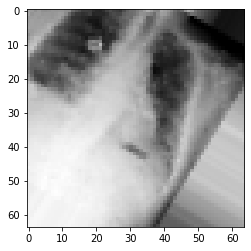

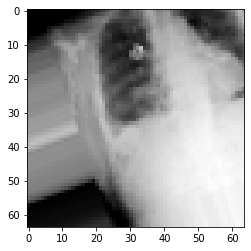

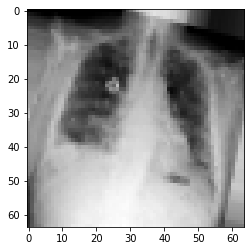

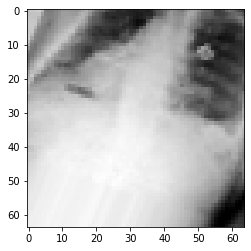

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_nodule, fname) for fname in os.listdir(train_nodule)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(64, 64))

# Convert it to a Numpy array with shape (64, 64, 3)
x = image.img_to_array(img)

# Reshape it to (1, 64, 64, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [0]:
# Your code here (train_generator)

Found 2400 images belonging to 7 classes.


In [0]:
# Your code her (Define model and how to compile model)

In [0]:
# Your code here (Train network)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Save your model
model.save('chest_2.h5')
model_file = drive.CreateFile({'chest_2' : 'chest_2.h5'})
model_file.SetContentFile('chest_2.h5')
model_file.Upload()
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1q-7a4qabo9ZITIJ6gTznW3rrsCQiUkYg'})

#### Plot training and validation loss
Plot the training and validation loss. Does the model seem to be overfitting? Did data augmentation do anything to mitigate overfitting of the original model?


In [0]:
# Your code here

#### Test accuracy
Calculate and report the test set accuracy.

In [0]:
# Your code here

### C. Using a pretrained CNN without data augmentation

Use one of the pre-trained models in Keras that has been trained using the Imagenet data set as a convolutional base. Extract features by running your training set through the base. 

In [0]:
# Your code here

Take this output and train a classifier. You may use the classifier from previous parts of this question.

In [0]:
# Your code here

Save your model.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Save your model
model.save('chest_3.h5')
model_file = drive.CreateFile({'chest_3' : 'chest_3.h5'})
model_file.SetContentFile('chest_3.h5')
model_file.Upload()
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1d47rKbvYrQfoeboGzT60ygT4AVsKQlL4'})

#### Plot training and validation loss
Plot the training and validation loss. Does the model seem to be overfitting? Does this model improve on the original model?

In [0]:
# Your code here

#### Test accuracy
Calculate and report the test set accuracy.

In [0]:
# Your code here

### D. Summarize results
- Summarize the results from the 3 models you built. Which model would you choose to make future predictions? 


- List and describe at least reasons for the poor performance of the models.

